# YOLOv8 Modified for QAT Training

In [1]:
import ultralytics
import os

ultralytics.checks()
print(os.getcwd())

CURRENT_DIR = os.getcwd()

Ultralytics YOLOv8.2.48 🚀 Python-3.9.19 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 12281MiB)
Setup complete ✅ (8 CPUs, 15.6 GB RAM, 92.8/250.9 GB disk)
/home/jeffrymahbuubi/Syringe-Detection/compression/ultralytics-qat-jeffry


## 1. Install TensorRT

In [3]:
!pip install --no-cache nvidia-tensorrt --index-url https://pypi.ngc.nvidia.com

Looking in indexes: https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.9/340.9 MB 7.1 MB/s eta 0:00:0000:0100:02


## 2. Download and Copy Necessary Files

- `yolov8n.pt` from [https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov8n.pt](https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov8n.pt)
- Copy, 
    - `trainer.py` from 📁 `ultralytics-qat` to the `./ultralytics/ultralytics/engine`
    - `validator.py` from 📁 `ultralytics-qat` to the `./ultralytics/ultralytics/engine`
    - `default.py` from 📁 `ultralytics-qat` to the `./ultralytics/ultralytics/cfg`
    - `train.py` from 📁 `ultralytics-qat` to the `./ultralytics`

In [28]:
!curl -fsSL -o ./yolov8n.pt https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov8n.pt

In [3]:
# Duplicate the original trainer.py, validator.py and default.yaml
# !cp ./ultralytics/engine/trainer.py ./ultralytics/engine/trainer_original.py
# !cp ./ultralytics/engine/validator.py ./ultralytics/engine/validator_original.py
# !cp ./ultralytics/cfg/default.yaml ./ultralytics/cfg/default_original.yaml

In [4]:
# Copy the new trainer.py, validator.py and default.yaml
!cp /home/jeffrymahbuubi/Syringe-Detection/compression/ultralytics-qat/trainer.py ./ultralytics/engine/
!cp /home/jeffrymahbuubi/Syringe-Detection/compression/ultralytics-qat/validator.py ./ultralytics/engine/
!cp /home/jeffrymahbuubi/Syringe-Detection/compression/ultralytics-qat/default.yaml ./ultralytics/cfg/
!cp /home/jeffrymahbuubi/Syringe-Detection/compression/ultralytics-qat/train.py .

In [5]:
# QAT copy directory
# !mkdir -p ./ultralytics/engine/QAT
# !cp -r /home/jeffrymahbuubi/Syringe-Detection/compression/ultralytics-qat/QAT/* ./ultralytics/engine/QAT/

## 3. Upgrade necessary wheel

In [15]:
!python3 -m pip install --upgrade pip wheel
!pip install nvidia-pyindex
!wget https://developer.download.nvidia.com/compute/redist/onnx-graphsurgeon/onnx_graphsurgeon-0.3.27-py2.py3-none-any.whl
!pip install ./onnx_graphsurgeon-0.3.27-py2.py3-none-any.whl
%rm ./onnx_graphsurgeon-0.3.27-py2.py3-none-any*

  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
Using cached wheel-0.43.0-py3-none-any.whl (65 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-pyindex: filename=nvidia_pyindex-1.0.9-py3-none-any.whl size=8416 sha256=64122a66507dc676bc084450fd49bcc3f176f7e2ff33edae42425e9df35ed406
  Stored in directory: /home/jeffrymahbuubi/.cache/pip/wheels/39/63/71/c50214b560fa8c319598c2de3c1616f6d68e1d2c7f17a5e82d
Successfully built nvidia-pyindex
--2024-07-03 15:05:34--  https://developer.download.nvidia.com/compute/redist/onnx-graphsurgeon/onnx_graphsurgeon-0.3.27-py2.py3-none-any.whl
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.39.144
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42150 (41K) [application/octet-stream]
Saving to: ‘onnx_graphsurgeon-0.3.27-py2.py3-none-any.whl’

onnx_graphsurgeon-0 100%[===

## 4. Install `pytorch-quantization`

In [16]:
!pip install pytorch-quantization==2.1.3

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 148.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 9.5 MB/s eta 0:00:00a 0:00:01m


## 5. Setup `gc` (garbage collector) and clear any `cache`

In [10]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

## 6. Start Training

### 6.1. Training with `train.py` and argument `--model=yolov8n.pt`, `--epochs=0`, `--batch=16`, `--device=0` , `--qat`, `--data=coco128.yaml` 

In [3]:
!python train.py --pretrained=yolov8n.pt --data=coco128.yaml --model=yolov8n-modified.yaml --epochs=0 --batch=8 --device=0 --qat --workers=4 --device=0 --name=QAT_b8_e0_q40_relu6_rect --exist_ok --rect

Transferred 355/355 items from pretrained weights
New https://pypi.org/project/ultralytics/8.2.51 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.48 🚀 Python-3.9.19 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 12281MiB)
engine/trainer: task=detect, mode=train, model=yolov8n-modified.yaml, data=coco128.yaml, epochs=0, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=QAT_b8_e0_q40_relu6_rect, exist_ok=True, pretrained=yolov8n.pt, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=None, overlap_mask=True, mask_ratio=4, dropout=0.0, qat=True, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment

In [12]:
!python train.py --pretrained=yolov8n.pt --data=/home/jeffrymahbuubi/Syringe-Detection/compression/ultralytics-qat-jeffry/datasets/line-detection-qat/cc50/data.yaml --model=yolov8n-modified.yaml --epochs=100 --batch=8 --device=0 --qat --workers=4 --device=0 --name=QAT_b16_e100_q40_silu_rect_line_detection_50cc --exist_ok --rect --single_cls

Transferred 355/355 items from pretrained weights
New https://pypi.org/project/ultralytics/8.2.50 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.48 🚀 Python-3.9.19 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 12281MiB)
engine/trainer: task=detect, mode=train, model=yolov8n-modified.yaml, data=/home/jeffrymahbuubi/Syringe-Detection/compression/ultralytics-qat-jeffry/datasets/line-detection-qat/cc50/data.yaml, epochs=100, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=QAT_b16_e100_q40_silu_rect_line_detection_50cc, exist_ok=True, pretrained=yolov8n.pt, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=True, rect=True, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=None, overlap_mask=True, mask_ratio=4, dropout=0.0, qat=True, val=True, split=val, save_json=False, save_hybrid=False, conf=None, io

## 7. Experiment Summary

- Thursday, 4 July 2024
    - Epoch = 100
    - Batch = 8
    - Activation: 
        - `ReLU`
            - mAP50, 
                - Original = 0.644
                - Fine-Tuning with QAT = 0.641
        - `SiLU`
            - mAP50, 
                - Original = 0.710
                - Fine-Tuning with QAT = 0.717
    - Parameter
        - `--rect` = False

- Friday, 5 July 2024
    - **Experiment 1**: 
        - Epoch = 100
        - Batch = 8
        - Activation: 
            - `SiLU`
                - mAP50, 
                    - Original = 0.63
                    - Fine-Tuning with QAT = 0.68
        - Parameter
            - `--rect` = True
    - **Experiment 2**: 
        - Epoch = 200
        - Batch = 8
        - Activation: 
            - `SiLU`
                - mAP50, 
                    - Original = 0.814
                    - Fine-Tuning with QAT = 0.877 
        - Parameter: 
            - `--rect` = True
- Sunday, 7 July 2024
    - **Rotation Detection**
        - Epoch = 200
        - Epoch-QAT = 20
        - Batch = 8
        - Activation: 
            - `SiLu`
                - mAP50, 
                    - Original = 0.922
                    - Fine-Tuning with QAT = 0.993 
                - mAP50-95,
                    - Original = 0.855
                    - Fine-Tuning with QAT = 0.827
        - Parameter:
            - `--rect` = True
    - **Syringe Detection**
        - Epoch = 100
        - Epoch-QAT = 40
        - Batch = 8
        - Activation:
            - `SiLU`
                - mAP50, 
                    - Original = 0.99
                    - Fine-Tuning with QAT = 0.98 
        - Parameter:
            - `--rect` = True
- Tuesday, 9 July 2024
    - **Experiment 3**:
        - Epoch = 200
        - Epoch-QAT = 40
        - Batch = 8
        - Activation:
            - `ReLU`,
                - mAP50, 
                    - Original = 0.76 
                    - Fine-Tuning with QAT = 0.87
                - mAP50-95,
                    - Original = 0.58
                    - Fine-Tuning with QAT = 0.67
        - Parameter:
            - `--rect` = True

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


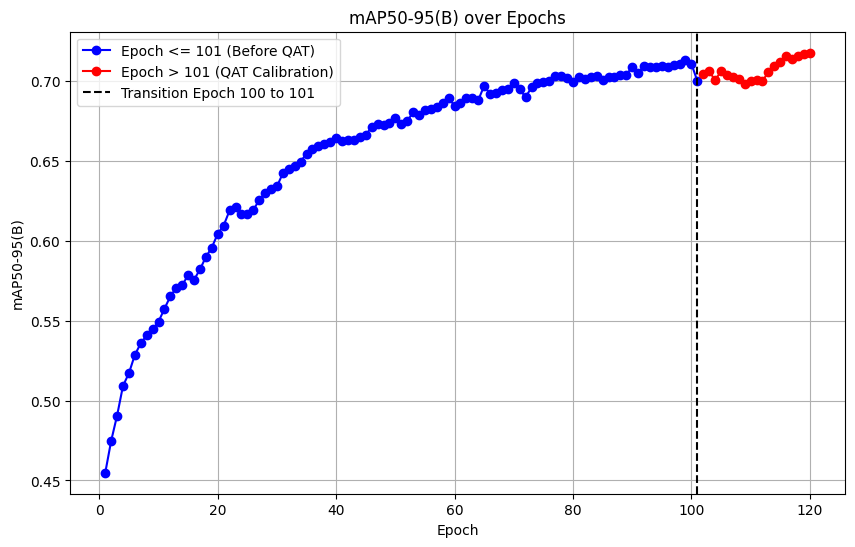

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/home/jeffrymahbuubi/Syringe-Detection/compression/ultralytics-qat-jeffry/run/detect/QAT_b16_e100_silu/results.csv'
data = pd.read_csv(file_path)

# Clean column names by stripping whitespace
data.columns = data.columns.str.strip()

# Print cleaned column names to verify
print(data.columns)

# Extract the relevant columns
epochs = data['epoch']
map50_95 = data['metrics/mAP50-95(B)']

# Plot the data
plt.figure(figsize=(10, 6))

# Plot epochs below 101
plt.plot(epochs[epochs <= 101], map50_95[epochs <= 101], marker='o', linestyle='-', color='b', label='Epoch <= 101 (Before QAT)')

# Plot epochs above 101
plt.plot(epochs[epochs > 101], map50_95[epochs > 101], marker='o', linestyle='-', color='r', label='Epoch > 101 (QAT Calibration)')

# Add vertical line at epoch 101
plt.axvline(x=101, color='k', linestyle='--', label='Transition Epoch 100 to 101')

# Add titles and labels
plt.title('mAP50-95(B) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('mAP50-95(B)')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
